#### Riccardo Cusinato - 3627460
#### Giacomo Barzon - 3626438
#### Damiano Sgarbossa - 3623971  

# Exercise 1 - Order of an ODE integration scheme

Consider the differential equation:
$$\dfrac{dy}{dt} = f ( y, t )$$
This may be integrated discretely with a Runge-Kutta scheme of the form:
$$k_1 = f(y_n,t_n)$$
$$k_2 = f(y_n+k_1\Delta t,t_n+\Delta t)$$
$$y_{n+1} = y_n + \dfrac{1}{2}(k_1+k_2)\Delta t$$
Show that the truncation error per step is of third-order in the step-size $\Delta t$, or in other words, that the scheme is second-order accurate for the global integration error.

### Solution:

To show the order of the truncation error we must evaluate the difference between the RK value of $y_{n+1}$ and the taylor expansion of $y(t_n+\Delta t)$ stopping at the third order (in$\Delta t$) terms:
$$\Delta y = y_{n+1} - y(t_n+\Delta t) = y_n + \dfrac{\Delta t}{2}(k_1+k_2) - (y_n + \Delta t y^{(1)}_n + \dfrac{\Delta t^2}{2} y^{(2)}_n + \dfrac{\Delta t^3}{6} y^{(3)}_n) = $$
$$= \dfrac{\Delta t}{2}(f(y_n,t_n)+f(y_n+k_1\Delta t,t_n+\Delta t))-(\Delta t f(y_n,t_n) + \dfrac{\Delta t^2}{2} f^{(1)}(y_n,t_n) + \dfrac{\Delta t^3}{6} f^{(2)}(y_n,t_n)$$
Here with the exponent between the parentesis we mean the total derivative in time, also in the following calculations we will use the following notation: $f_n=f(y_n,t_n)$.
Now we obtain:
$$\Delta y = \Delta t f_n+\dfrac{\Delta t^2}{2} (f_n\partial_y f_n+\partial_t f_n)+\dfrac{\Delta t^3}{4}(f_n^2\partial_y^2 f_n+f_n\partial_t\partial_y f_n+f_n\partial_y\partial_t f_n+\partial_t^2 f_n)-\Delta t f_n - \dfrac{\Delta t^2}{2} (f_n\partial_y f_n+\partial_t f_n) - \dfrac{\Delta t^3}{6}(f_n^2\partial_y^2 f_n+f_n(\partial_y f_n)^2+f_n\partial_y\partial_t f_n+\partial_t f_n\partial_y f_n+f_n\partial_t\partial_y f_n+\partial_t^2 f_n))$$
So finally we obtain:
$$\Delta y =\dfrac{\Delta t^3}{4}(f_n^2\partial_y^2 f_n+f_n\partial_t\partial_y f_n+f_n\partial_y\partial_t f_n+\partial_t^2 f_n)-\dfrac{\Delta t^3}{6}(f_n^2\partial_y^2 f_n+f_n(\partial_y f_n)^2+f_n\partial_y\partial_t f_n+\partial_t f_n\partial_y f_n+f_n\partial_t\partial_y f_n+\partial_t^2 f_n))\neq 0$$
So we showed that the order of the solution is $\Delta t^3$

# Exercise 2 - Double pendulum

### a) Derive the Lagrangian equations of motion:

After defining the conjugate momenta $q_1 = \dfrac{\partial L}{\partial \dot \phi_1}$ and $q_2 = \dfrac{\partial L}{\partial \dot \phi_2}$, the equations of motion become: <br/>

$\dot\phi_1 = \dfrac{l_2 q_1 - l_1 q_2 cos(\phi_1 - \phi_2)}{l_1^2 l_2 [m_1 + m_2 sin(\phi_1 - \phi_2)^2]}$ <br/>
$\dot\phi_2 = \dfrac{l_1 q_2 (m_1+m_2) - l_2 m_2 q_1 cos(\phi_1 - \phi_2)}{m_2 l_1 l_2^2 [m_1 + m_2 \sin(\phi_1 - \phi_2)^2]}$ <br/>
$\dot q_1 = - l_1 l_2 m_2 \dot\phi_1 \dot \phi_2 \sin(\phi_1 - \phi_2) - l_1 g (m_1+m_2)\sin(\phi_1)$ <br/>
$\dot q_2 = l_1 l_2 m_2 \dot\phi_1 \dot \phi_2 \sin(\phi_1 - \phi_2) - l_2 g m_2\sin(\phi_2)$

### b) Cast the system of equations into 1st-order form:

We can rewrite the above equations of motion as:<br/> <br/>
$\dot\phi_1 = f_1(\phi_1,\phi_2,q_1,q_2)$ <br/>
$\dot\phi_2 = f_2(\phi_1,\phi_2,q_1,q_2)$ <br/>
$\dot q_1 = - l_1 l_2 m_2 f_1(\phi_1,\phi_2,q_1,q_2) f_2(\phi_1,\phi_2,q_1,q_2) \sin(\phi_1 - \phi_2) - l_1 g (m_1+m_2)\sin(\phi_1) = f_3(\phi_1,\phi_2,q_1,q_2)$ <br/>
$\dot q_2 = l_1 l_2 m_2 f_1(\phi_1,\phi_2,q_1,q_2) f_2(\phi_1,\phi_2,q_1,q_2) \sin(\phi_1 - \phi_2) - l_2 g m_2\sin(\phi_2) = f_4(\phi_1,\phi_2,q_1,q_2)$ <br/> <br/>

Defining $\vec y = (\phi_1,\phi_2,q_1,q_2)$ as state vector, the system is decribed by the 1st-order ODE: <br/> <br/>
$\dfrac{d \vec y}{d t} = \vec f(\vec y) = \begin{bmatrix}
    f_1(\vec y) \\ f_2(\vec y) \\ f_3(\vec y) \\ f_4(\vec y)
\end{bmatrix}$

### c) Write a computer program that integrates the system with a second-order predictor-corrector Runge-Kutta scheme
### Plot the relative energy error $\dfrac{E_{tot}(t)-E_{tot}(t_0)}{E_{tot}(t_0)}$

The total energy of the sistem is defined as: <br/>
$E = \dot\phi_1 q_1 + \dot\phi_2 q_2 - L$ <br/>
where:<br/>
$L = \dfrac{m_1}{2}(l_1 \dot\phi_1)^2 + \dfrac{m_2}{2}[(l_1 \dot\phi_1)^2 + (l_2 \dot\phi_2)^2
    + 2 l_1 l_2 \dot\phi_1 \dot\phi_2 \cos(\phi_1 - \phi_2)]
    - m_1 g l_1 (1 - \cos(\phi_1)) - m_2 g [l_1 (1 - \cos(\phi_1)) + l_2 (1 - \cos(\phi_2)) ]   $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
phi1_0 = np.radians(50.)
phi2_0 = np.radians(-120.)
q1_0 = 0.
q2_0 = 0.

# Parameters of the system
m1 = 0.5
m2 = 1.0
l1 = 2.0
l2 = 1.0

g = 1.0

# Simulation timestep and total simulated time
dt = 0.05
T = 100.0

steps = np.int(np.ceil(T / dt))


In [2]:
# ODE definition
def f1(y):
    phi1, phi2, q1, q2 = y
    
    return ( l2*q1 - l1*q2*np.cos(phi1-phi2) ) / ( l1**2 * l2 * (m1 + m2*np.sin(phi1-phi2)**2) )

def f2(y):
    phi1, phi2, q1, q2 = y
    
    return ( l1*q2*(m1+m2) - l2*m2*q1*np.cos(phi1-phi2) ) / ( m2 * l1 * l2**2 * (m1 + m2*np.sin(phi1-phi2)**2) )

def f3(y):
    phi1, phi2, q1, q2 = y
    
    return -l1*l2*m2*f1(y)*f2(y)*np.sin(phi1-phi2) - l1*g*(m1+m2)*np.sin(phi1)

def f4(y):
    phi1, phi2, q1, q2 = y
    
    return l1*l2*m2*f1(y)*f2(y)*np.sin(phi1-phi2) - l2*g*m2*np.sin(phi2)

def f(y):
    return np.array([f1(y), f2(y), f3(y), f4(y)])

In [3]:
# Energy function definition
def L(y):
    phi1, phi2, q1, q2 = y
    
    phi1dot = f1(y)
    phi2dot = f2(y)
    
    return ( 0.5*m1*(l1*phi1dot)**2 +
        0.5*m2*( (l1*phi1dot)**2 + (l2*phi2dot)**2 + 2.*l1*l2*phi1dot*phi2dot*np.cos(phi1-phi2) ) -
        m1*g*l1*(1-np.cos(phi1)) - m2*g*( l1*(1-np.cos(phi1)) + l2*(1-np.cos(phi2)) ) )

def E(y):
    phi1, phi2, q1, q2 = y
    
    phi1dot = f1(y)
    phi2dot = f2(y)
        
    return phi1dot*q1 + phi2dot*q2 - L(y)

def errorE(y, E0):
    return (E(y)-E0) / E0

In [4]:
# RUNGE-KUTTA SECOND ORDER

t = np.arange(0,steps+1)
t = t * dt

y = np.zeros((4, steps+1))
y[:,0] = [phi1_0, phi2_0, q1_0, q2_0] # setting initial conditions

# loop over timesteps
for i in range(1,steps+1):
    k1 = f(y[:,i-1]) * dt
    k2 = f(y[:,i-1] + k1) * dt
    
    y[:,i] = y[:,i-1] + 0.5 * (k1 + k2)

Text(0.5, 1.0, 'Temporal evolution')

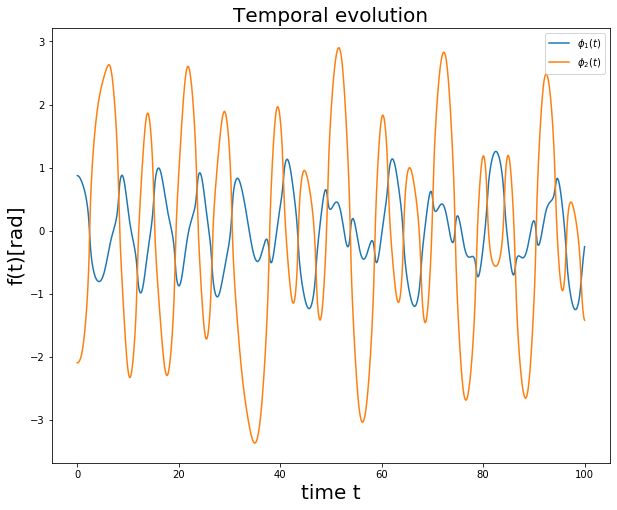

In [5]:
# Plot of the temporal evolution of the coordinates
plt.figure(figsize=[10,8])
plt.plot(t, y[0,:])
plt.plot(t, y[1,:])
plt.xlabel('time t', fontsize = 20)
plt.ylabel('f(t)[rad]', fontsize = 20)
plt.legend(['$\phi_1(t)$','$\phi_2(t)$'])
plt.title('Temporal evolution', fontsize = 20)

Text(0.5, 1.0, 'Phase space plot')

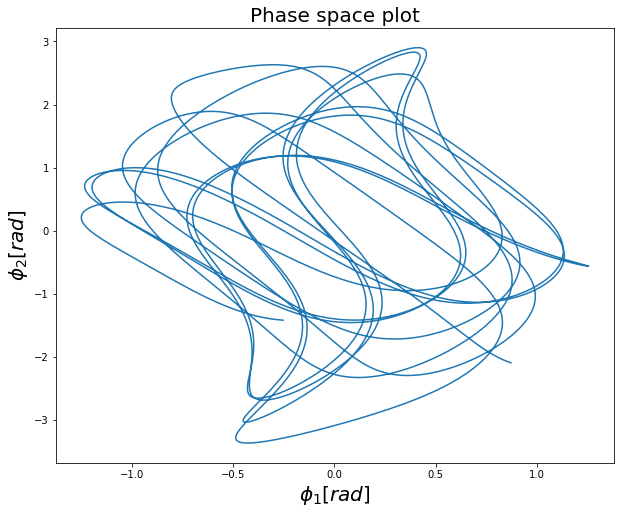

In [6]:
# Phase-space plot
plt.figure(figsize=[10,8])
plt.plot(y[0,:], y[1,:])
plt.xlabel('$\phi_1 [rad]$', fontsize = 20)
plt.ylabel('$\phi_2 [rad]$', fontsize = 20)
plt.title('Phase space plot', fontsize = 20)

Text(0.5, 1.0, 'Cartesian coordinates evolution')

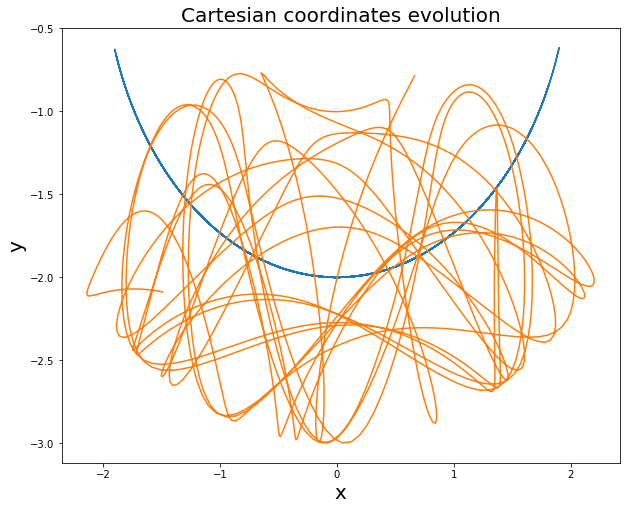

In [7]:
# Convert to cartesian coordinate
x1 = l1 * np.sin(y[0,:])
y1 = -l1 * np.cos(y[0,:])
x2 = x1 + l2 * np.sin(y[1,:])
y2 = y1 - l2 * np.cos(y[1,:])

plt.figure(figsize=[10,8])
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Cartesian coordinates evolution', fontsize = 20)

Text(0.5, 1.0, 'Relative error evolution')

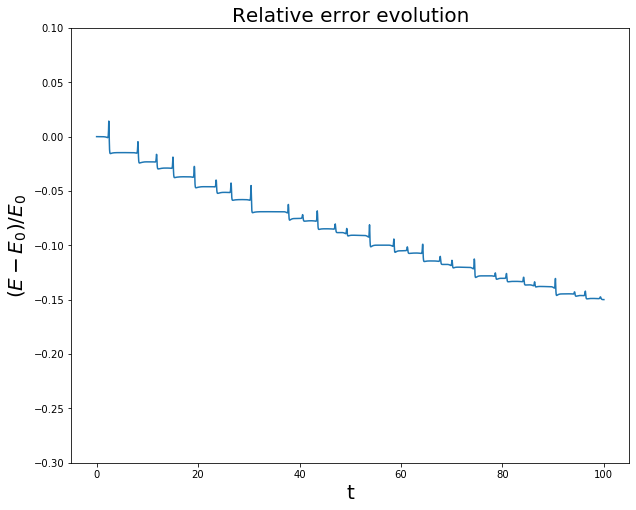

In [8]:
# RELATIVE ENERGY ERROR PLOT
E0 = E(y[:,0])

plt.figure(figsize=[10,8])
plt.plot(t,errorE(y, E0))
plt.xlabel('t', fontsize = 20)
plt.ylabel('$(E-E_0)/E_0$', fontsize = 20)
plt.ylim(-0.3,0.1)
plt.title('Relative error evolution', fontsize = 20)

### d) Produce a second version of your code that uses a fourth-order Runge-Kutta scheme instead. Repeat the simulation from (c) with the same timestep size, and again plot the energy error

In [9]:
# RUNGE-KUTTA FOURTH ORDER

t = np.arange(0,steps+1)
t = t * dt

z = np.zeros((4, steps+1))
z[:,0] = [phi1_0, phi2_0, q1_0, q2_0] # setting initial conditions

# loop over timesteps
for i in range(1,steps+1):
    k1 = f(z[:,i-1]) * dt
    k2 = f(z[:,i-1] + 0.5 * k1) * dt
    k3 = f(z[:,i-1] + 0.5 * k2) * dt
    k4 = f(z[:,i-1] + k3) * dt
    
    z[:,i] = z[:,i-1] + k1/6. + k2/3. + k3/3. + k4/6.

Text(0.5, 1.0, 'Temporal evolution')

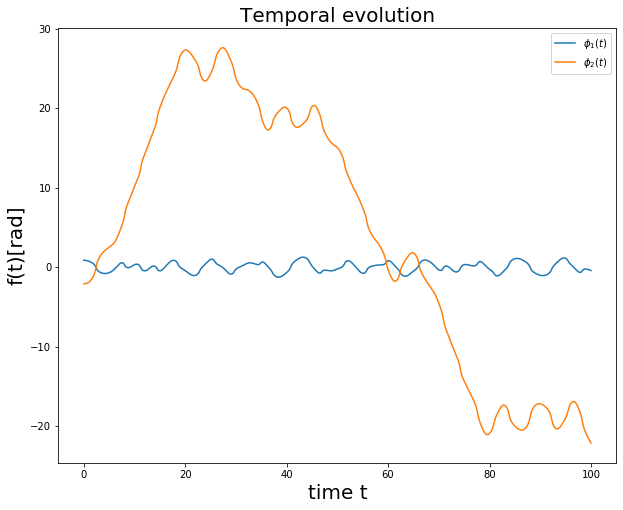

In [10]:
# Plot of the temporal evolution of the coordinates
plt.figure(figsize=[10,8])
plt.plot(t, z[0,:])
plt.plot(t, z[1,:])
plt.xlabel('time t', fontsize = 20)
plt.ylabel('f(t)[rad]', fontsize = 20)
plt.legend(['$\phi_1(t)$','$\phi_2(t)$'])
plt.title('Temporal evolution', fontsize = 20)

Text(0.5, 1.0, 'Phase space plot')

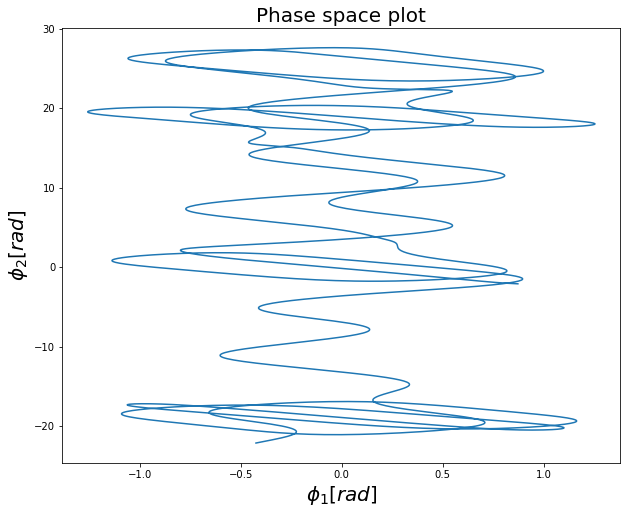

In [11]:
# Phase-space plot
plt.figure(figsize=[10,8])
plt.plot(z[0,:], z[1,:])
plt.xlabel('$\phi_1 [rad]$', fontsize = 20)
plt.ylabel('$\phi_2 [rad]$', fontsize = 20)
plt.title('Phase space plot', fontsize = 20)

Text(0.5, 1.0, 'Relative error evolution')

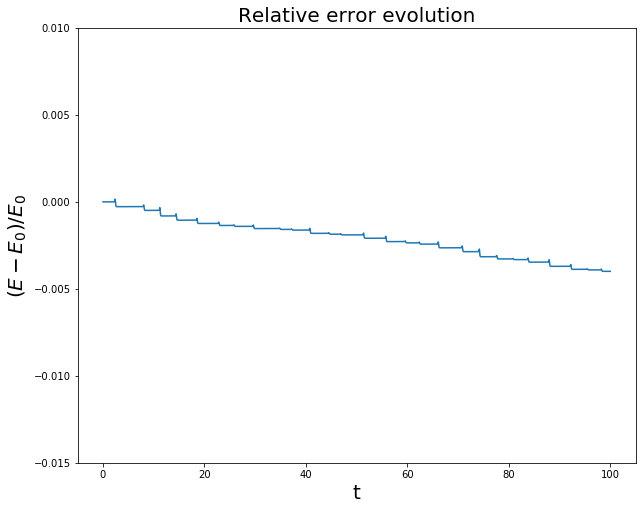

In [12]:
# RELATIVE ENERGY ERROR PLOT
E0 = E(z[:,0])

plt.figure(figsize=[10,8])
plt.plot(t,errorE(z, E0))
plt.xlabel('t', fontsize = 20)
plt.ylabel('$(E-E_0)/E_0$', fontsize = 20)
plt.ylim(-0.015,0.01)
plt.title('Relative error evolution', fontsize = 20)

Text(0.5, 1.0, 'Comparison of the relative error evolution')

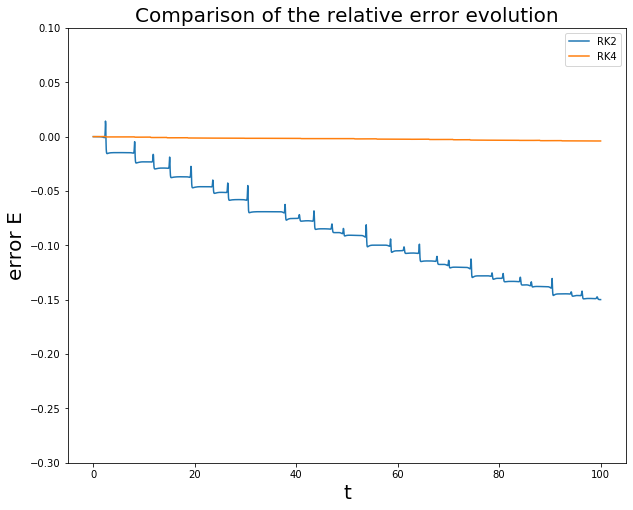

In [13]:
# Comparison of the error trends
plt.figure(figsize=[10,8])
plt.plot(t,errorE(y, E(y[:,0])), label='RK2')
plt.plot(t,errorE(z, E(z[:,0])), label='RK4')
plt.xlabel('t', fontsize = 20)
plt.ylabel('error E', fontsize = 20)
plt.legend()
plt.ylim(-0.3,0.1)
plt.title('Comparison of the relative error evolution', fontsize = 20)

### Comments:
Here we can notice that the RK4 algorithm is more precise than the RK2 algorithm: in fact the relative error on the energy is one order of magnitude smaller; also in both the algorithms we can see that the error on the energy increases with time (in absolute value): this means that these procedures don't conserve the energy of the system so they're not symplectic. <br/>
Another important thing we can notice is that the trajectory of the system changes completely in the 2 procedures, this is due to the chaoticity of the system: it means that two solutions with different initial conditions (even if they differ of infinitesimal values) can lead to completely different trajectories in enough time. So now, due to the fact that the 2 algorithms compute the steps in a different way obtaining different points, the chaoticity of the system leads to completely different time evolutions.

### e) Make a movie of the motion of the Double Pendulum 

In [14]:
# Create a series of 2000 images that will be then coverted in a movie

def frame(phi1, phi2, phi1_arr, phi2_arr, t, num):
    #length of the pendula
    L1 = 2.
    L2 = 1.
    L = L1 + L2
    
    #create a new figure
    fig = plt.figure(figsize=[8,8], facecolor='white')
    axes = fig.gca()

    #proportional x and y axis
    axes.axis("equal")
    #no coordinate labels
    axes.set_axis_off()
    #set the plot range in x and y direction
    axes.set_ylim([-(L+0.2),(L+0.2)])
    axes.set_xlim([-(L+0.2),(L+0.2)])
    
    
    #calculate position of pendula
    pos1 = np.zeros(2)
    pos2 = np.zeros(2)
    
    pos1[0] = L1 * np.sin(phi1)
    pos1[1] = - L1 * np.cos(phi1)
    pos2[0] = pos1[0] + L2 * np.sin(phi2)
    pos2[1] = pos1[1] - L2 * np.cos(phi2)
    
    #plot the two pendula
    c0 = plt.Circle([0.,0.],.07, color='k', zorder=100)
    c1 = plt.Circle(pos1,.05, color='r', zorder=100)
    c2 = plt.Circle(pos2,.05, color='b', zorder=100)
    axes.add_artist(c0)
    axes.add_artist(c1)
    axes.add_artist(c2)
    
    #plot the two limbs
    axes.plot([0., pos1[0]], [0., pos1[1]], color='k', linewidth=2, zorder=50)
    axes.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], color='k', linewidth=2, zorder=50)
    
    #add the trajectory in the background
    N = len(phi1_arr)
    pos1_arr = np.zeros((N,2))
    pos2_arr = np.zeros((N,2))
    
    pos1_arr[:,0] = L1 * np.sin(phi1_arr)
    pos1_arr[:,1] = - L1 * np.cos(phi1_arr)
    pos2_arr[:,0] = pos1_arr[:,0] + L2 * np.sin(phi2_arr)
    pos2_arr[:,1] = pos1_arr[:,1] - L2 * np.cos(phi2_arr)
    
    axes.plot(pos1_arr[:,0], pos1_arr[:,1], color='r', linewidth = 0.5, zorder=0)
    axes.plot(pos2_arr[:,0], pos2_arr[:,1], color='b', linewidth = 0.5, zorder=0)
    
    #add a time label
    axes.text(0.7,0.85, "T = %03.2f"%t, transform = fig.transFigure, fontsize=16, horizontalalignment='left', verticalalignment='center')
        
    #save the figure
    fig.savefig("frame_%04d.png"%num, dpi=80)
    
    plt.close(fig)
    
    
if __name__ == "__main__":
    phi1 = z[0,:]
    phi2 = z[1,:]
    
    for i in range(0, len(z[0,:])):
        frame(phi1[i], phi2[i], phi1[:i+1], phi2[:i+1], i*0.2, i)